<a href="https://colab.research.google.com/github/MariaElisaOliveiraMartins/DS_Analises/blob/main/Olist_Logistica_(1)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Olist - Análise 01

A base de dados utilizada nesta análise foi publicada e obtida pelo Kaggle, a qual foi oferecida pela empresa de e-commerce Olist, como conbribuição à comunidade de Data Science.

A modelagem do banco e os metadados estão descritos nos desafios propostos pela Olist dentro do portal do Kaggle.

## Pegunta: o que você pode tirar de informação útil desse conjunto de dados?

### Resumo deste trabalho:

### 1) Junção das tabelas de pedidos e de clientes.
### 2) Análise do dataframe resultante da junção.
### 3) Verificação de Outliers, médias e correlações.
### 4) Conclusões e considerações sobre as análises.

## 1) Junção das tabelas de pedidos e de clientes.

Acesso ao Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Bibliotecas utilizadas nessa análise

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sbn 
from matplotlib import pyplot as plt


Carga e apresentação dos arquivos

In [ ]:
# Arquivos de Pedidos (order)

df_order = pd.read_excel('/content/drive/My Drive/Dados_DS/Dados Olist/olist_orders_dataset.xlsx')

In [ ]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99295 non-null  datetime64[ns]
 6   order_delivered_customer_date  97659 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [ ]:
# Arquivo de Clientes (customers)
df_custm = pd.read_excel('/content/drive/My Drive/Dados_DS/Dados Olist/olist_customers_dataset.xlsx')

In [ ]:
df_custm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Junção do arquivo de Cliente com o de Pedidos (chv = customer_id)

In [ ]:
# Merge entre os dois dataframes
df_result = pd.merge(df_order, df_custm, on='customer_id')

In [ ]:
# Resultado da junção
df_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99295 non-null  datetime64[ns]
 6   order_delivered_customer_date  97659 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
 8   customer_unique_id             99441 non-null  object        
 9   customer_zip_code_prefix       99441 non-null  int64         
 10  customer_city                  99441 non-null  object        
 11  customer_state 

In [ ]:
df_result.pop('customer_unique_id')  # Exlusão de informação desnecessaria

0        7c396fd4830fd04220f754e42b4e5bff
1        af07308b275d755c9edb36a90c618231
2        3a653a41f6f9fc3d2a113cf8398680e8
3        7c142cf63193a1473d2e66489a9ae977
4        72632f0f9dd73dfee390c9b22eb56dd6
                       ...               
99436    6359f309b166b0196dbf7ad2ac62bb5a
99437    da62f9e57a76d978d02ab5362c509660
99438    737520a9aad80b3fbbdad19b66b37b30
99439    5097a5312c8b157bb7be58ae360ef43c
99440    60350aa974b26ff12caad89e55993bd6
Name: customer_unique_id, Length: 99441, dtype: object

In [ ]:
# Backup dos arquivos (p/ eventual emergência)
bkp_order = df_order.copy()
bkp_custm = df_custm.copy()
bkp_df_result = df_result.copy()
#df_order = bkp_order.copy()
#df_custm = bkp_custm.copy()
#df_result = df_result.copy()

## 2) Análise do dataframe resultante da junção.

In [ ]:
# Troca de nomes das colunas
new_names = {'order_id':'ID_PEDIDO', 'customer_id':'ID_CLIENTE', 'order_status':'STATUS', 'order_purchase_timestamp':'DT_COMPRA', \
             'order_approved_at':'DT_APROV', 'order_delivered_carrier_date':'DT_ENVIO', 'order_delivered_customer_date':'DT_ENTREGA', \
             'order_estimated_delivery_date': 'DT_PREVISTA', 'customer_zip_code_prefix':'CL_CEP', 'customer_city':'CL_CIDADE', 'customer_state':'CL_UF'}
df_result.rename(columns=new_names, inplace=True)

In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)  # Ajuste para formatação dos dados tipo "float".

In [ ]:
df_result.head()   # Análise das primeiras linhas 

,ID_PEDIDO,ID_CLIENTE,STATUS,DT_COMPRA,DT_APROV,DT_ENVIO,DT_ENTREGA,DT_PREVISTA,CL_CEP,CL_CIDADE,CL_UF
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,9195,santo andre,SP


In [ ]:
df_result.tail() # Análise das últimas linhas

,ID_PEDIDO,ID_CLIENTE,STATUS,DT_COMPRA,DT_APROV,DT_ENVIO,DT_ENTREGA,DT_PREVISTA,CL_CEP,CL_CIDADE,CL_UF
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,12209,sao jose dos campos,SP
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,11722,praia grande,SP
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,45920,nova vicosa,BA
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,28685,japuiba,RJ
99440,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03,83750,lapa,PR


In [ ]:
print(df_result.shape)  # Confirmação da dimensão do dataframe
tot_lin_inic = df_result.shape[0]

(99441, 11)


### Análise quantitativa

In [ ]:
# Verificando a quantidade de dados registrados
df_result.count() 

ID_PEDIDO      99441
ID_CLIENTE     99441
STATUS         99441
DT_COMPRA      99441
DT_APROV       99441
DT_ENVIO       99295
DT_ENTREGA     97659
DT_PREVISTA    96461
CL_CEP         99441
CL_CIDADE      99441
CL_UF          99441
dtype: int64

#### Obs: 

1) Tanto a quantidade de envios quanto de entregas superam a quantidade de previsões de entrega, o que sugere que algumas previsões de entrega não foram  registradas.

2) A princípio a data de previsão de entrega deveria ser registrada no momento em que é feito o envio (suposição).


In [ ]:
# Verficação da quantidade de nulos
df_result.isnull().sum() 

ID_PEDIDO         0
ID_CLIENTE        0
STATUS            0
DT_COMPRA         0
DT_APROV          0
DT_ENVIO        146
DT_ENTREGA     1782
DT_PREVISTA    2980
CL_CEP            0
CL_CIDADE         0
CL_UF             0
dtype: int64

### Verificação da existencia de outliers

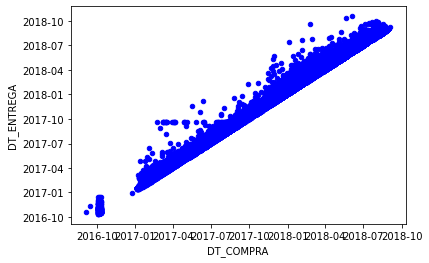

In [ ]:
# Distribuição/Dispersão entre a data da compra e a data da entrega.

df_result.plot(x='DT_COMPRA', y='DT_ENTREGA',kind='scatter', color='blue')


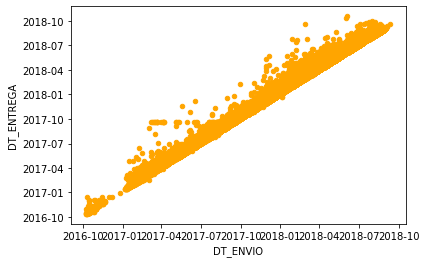

In [ ]:
# Distribuição/Dispersão entre a data da envio e a data da entrega.

df_result.plot(x='DT_ENVIO', y='DT_ENTREGA',kind='scatter', color='orange')

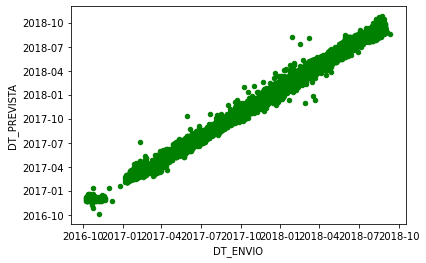

In [ ]:
# Distribuição/Dispersão entre a data de envio e a data prevista para entrega.

df_result.plot(x='DT_ENVIO', y='DT_PREVISTA',kind='scatter', color='green')

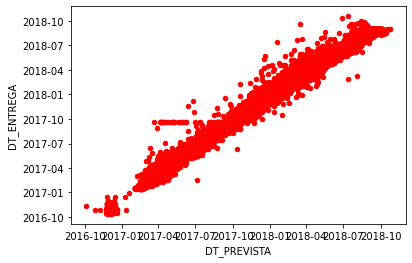

In [ ]:
# Distribuição/Dispersão entre a data de entrega prevista e a data de entrega realizada.

df_result.plot(x='DT_PREVISTA', y='DT_ENTREGA',kind='scatter', color='red')

### Perguntas objetivas:

A) Existem distorções na base de dados da Olist em relação às operações logísticas.

B) A relação entre a Previsão de Entrega e a Entrega Efetiva está adequada?

C) Quais seriam as métricas razoáveis para previsão e execução dos serviços de entrega? 

D) A remoção de possíveis disorções (outliers) causariam impacto significativo na análise?

E) Seria possível melhorar a previsão de entrega dos pedidos?

In [ ]:
# Verificação da situação (status) dos pedidos

df_status = df_result['STATUS'].value_counts()
df_status

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: STATUS, dtype: int64

Análise dos pedidos que não foram enviados

In [ ]:
# Apresentação dos pedidos cujo status diferem de "delivered" e/ou "shipped"

df_result[((df_result['STATUS'] != 'shipped') & (df_result['STATUS'] !=  'delivered'))]

,ID_PEDIDO,ID_CLIENTE,STATUS,DT_COMPRA,DT_APROV,DT_ENVIO,DT_ENTREGA,DT_PREVISTA,CL_CEP,CL_CIDADE,CL_UF
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,2017-05-09,NaT,NaT,98900,santa rosa,RS
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,2018-08-21,NaT,NaT,88140,santo amaro da imperatriz,SC
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,2017-10-03,NaT,NaT,3436,sao paulo,SP
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,2017-12-05,NaT,NaT,89288,sao bento do sul,SC
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,2016-12-09,NaT,NaT,3531,sao paulo,SP
...,...,...,...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,2018-10-01 00:00:00,NaT,NaT,NaT,11075,santos,SP
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,2018-02-06,NaT,NaT,13050,campinas,SP
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,2018-09-27 00:00:00,NaT,NaT,NaT,5344,sao paulo,SP
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,2017-09-15,NaT,NaT,22723,rio de janeiro,RJ


## Identificação dos Outliers

Candidatos a outliers:

1) Pedidos sem previsão de entrega cujo status é "delivered" ou "shipped".

2) Pedidos com previsão de entrega mas sem data de envio.

3) Pedidos com previsão de entrega cujo status é diferente de "delivered" ou shipped".

4) Pedidos com data de entrega cujo status é diferente de "delivered" ou "canceled".

5) Pedidos com data de entrega mas sem data prevista para entrega. ***


In [ ]:
# Caso 1 : pedidos que foram enviados ou entregues cujas datas de previsão de entrega não estão registradas.
df_out1 = df_result[((df_result['STATUS'] == 'shipped') | (df_result['STATUS'] ==  'delivered')) & (df_result['DT_PREVISTA'].isnull())]
df_out1.count()

ID_PEDIDO      1130
ID_CLIENTE     1130
STATUS         1130
DT_COMPRA      1130
DT_APROV       1130
DT_ENVIO       1130
DT_ENTREGA     1129
DT_PREVISTA       0
CL_CEP         1130
CL_CIDADE      1130
CL_UF          1130
dtype: int64

In [ ]:
# Caso 2 : pedidos cujas datas de previsão de entrega estão registradas mas a de envio não.
df_out2 = df_result[~(df_result['DT_PREVISTA'].isnull()) & (df_result['DT_ENVIO'].isnull())]
df_out2.count()


ID_PEDIDO      0
ID_CLIENTE     0
STATUS         0
DT_COMPRA      0
DT_APROV       0
DT_ENVIO       0
DT_ENTREGA     0
DT_PREVISTA    0
CL_CEP         0
CL_CIDADE      0
CL_UF          0
dtype: int64

In [ ]:
# Caso 3 : pedidos que não foram enviados ou entregues cujas datas de previsão de entrega estão registradas.
df_out3 = df_result[~((df_result['STATUS'] == 'shipped') | (df_result['STATUS'] ==  'delivered')) & (~df_result['DT_PREVISTA'].isnull())]
df_out3.count()


ID_PEDIDO      6
ID_CLIENTE     6
STATUS         6
DT_COMPRA      6
DT_APROV       6
DT_ENVIO       6
DT_ENTREGA     6
DT_PREVISTA    6
CL_CEP         6
CL_CIDADE      6
CL_UF          6
dtype: int64

In [ ]:
# Caso 4 : Pedidos cujas datas de entrega estão registradas mas o status não foi atualizado.
df_out4 = df_result[((df_result['STATUS'] != 'delivered') & (df_result['STATUS'] != 'canceled')) & (~df_result['DT_ENTREGA'].isnull())]
df_out4.count()


ID_PEDIDO      1107
ID_CLIENTE     1107
STATUS         1107
DT_COMPRA      1107
DT_APROV       1107
DT_ENVIO       1107
DT_ENTREGA     1107
DT_PREVISTA       0
CL_CEP         1107
CL_CIDADE      1107
CL_UF          1107
dtype: int64

In [ ]:
# Caso 5 : Pedidos cujas datas de entrega estão registradas mas a data de previsão de entrega não estão.
df_out5 = df_result[~(df_result['DT_ENTREGA'].isnull()) & (df_result['DT_PREVISTA'].isnull())]
df_out5.count()

ID_PEDIDO      1198
ID_CLIENTE     1198
STATUS         1198
DT_COMPRA      1198
DT_APROV       1198
DT_ENVIO       1198
DT_ENTREGA     1198
DT_PREVISTA       0
CL_CEP         1198
CL_CIDADE      1198
CL_UF          1198
dtype: int64

### Seleção e eliminação dos outliers (1ra. etapa)

In [ ]:
# Contatenação, classificação e eliminação da linhas duplicadas no dataframe de outliers.

df_out = df_out1.append(df_out3.append(df_out4.append(df_out5)))
print(df_out.shape)
df_out = df_out.sort_values('ID_PEDIDO')
df_out = df_out.drop_duplicates()
print(df_out.shape)

(3441, 11)
(1205, 11)


In [ ]:
# Remoção das linhas consideradas outliers.
idx_outliers = df_out.index
print('\n percentual de linhas descartadas: ', (len(idx_outliers)/df_result.shape[0]))
df_result = df_result.drop(index=idx_outliers)
print('\n qtde. de linhas do dataframe após a análise quantitativa : ', df_result.shape[0])


 percentual de linhas descartadas:  0.012117738156293682

 qtde. de linhas do dataframe após a análise quantitativa :  98236


### Análise qualitativa do dataframe

Verificar qualidade das datas registradas

Pergunta : existem datas de entrega ou de previsão de entrega anterior a data de envio ?

In [ ]:
# Obs: O boxplot (demonstra os outliers) não trabalha bem com datas.
# Estratégia: calcular o tempo de entrega previsto e do tempo de transporte efetivo, em quantidade de dias corridos.

from datetime import datetime
from datetime import date
df_result['TP_PREV'] = (df_result.DT_PREVISTA - df_result.DT_ENVIO).astype('timedelta64[D]')
df_result['TP_TRSP'] = (df_result.DT_ENTREGA - df_result.DT_ENVIO).astype('timedelta64[D]')
df_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98236 entries, 0 to 99440
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ID_PEDIDO    98236 non-null  object        
 1   ID_CLIENTE   98236 non-null  object        
 2   STATUS       98236 non-null  object        
 3   DT_COMPRA    98236 non-null  datetime64[ns]
 4   DT_APROV     98236 non-null  datetime64[ns]
 5   DT_ENVIO     98090 non-null  datetime64[ns]
 6   DT_ENTREGA   96455 non-null  datetime64[ns]
 7   DT_PREVISTA  96455 non-null  datetime64[ns]
 8   CL_CEP       98236 non-null  int64         
 9   CL_CIDADE    98236 non-null  object        
 10  CL_UF        98236 non-null  object        
 11  TP_PREV      96455 non-null  float64       
 12  TP_TRSP      96455 non-null  float64       
dtypes: datetime64[ns](5), float64(2), int64(1), object(5)
memory usage: 10.5+ MB


Análise das métricas de logistica (em dias)

In [ ]:
df_result.head()

,ID_PEDIDO,ID_CLIENTE,STATUS,DT_COMPRA,DT_APROV,DT_ENVIO,DT_ENTREGA,DT_PREVISTA,CL_CEP,CL_CIDADE,CL_UF,TP_PREV,TP_TRSP
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3149,sao paulo,SP,13.00000,6.00000
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,47813,barreiras,BA,17.00000,12.00000
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,75265,vianopolis,GO,26.00000,9.00000
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,59296,sao goncalo do amarante,RN,22.00000,9.00000
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,9195,santo andre,SP,11.00000,1.00000


Verificação das médias, medianas, percentis, máximos e mínimos.

In [ ]:
df_result.describe()   # Revelando os outliers ...

,CL_CEP,TP_PREV,TP_TRSP
count,98236.00000,96455.00000,96455.00000
mean,35135.97082,20.15723,8.87814
std,29833.19452,8.75584,8.74647
min,1003.00000,-100.00000,-17.00000
25%,11320.00000,14.00000,4.00000
50%,24360.00000,20.00000,7.00000
75%,58970.00000,25.00000,12.00000
max,99980.00000,192.00000,205.00000


/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


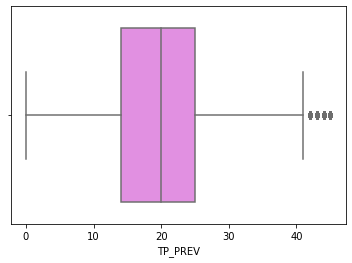

In [ ]:
import seaborn as sns
#sns.boxplot(x=df_result.TP_PREV, orient='vertical', color='violet' )
sns.boxplot(x=df_result.TP_PREV, orient="v", color='violet' )

/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


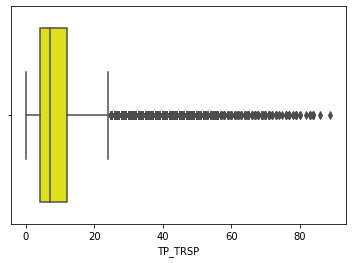

In [ ]:
sns.boxplot(x=df_result.TP_TRSP, orient='vertical', color='yellow')

/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


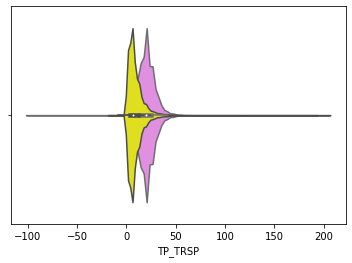

In [ ]:
sns.violinplot(x=df_result.TP_PREV, orient='vertical', color='violet' )
sns.violinplot(x=df_result.TP_TRSP, orient='vertical', color='yellow')


### Resposta às pergutas objetivas:

A) Existem distorções na base de dados da Olist em relação às operações de ligísticas.

R: Sim. Os outliers evidenciam que alguns dados foram registrados erroneamente gerando inclusive tempos negativos.

B) A relação entre a Previsão de Entrega e a Entrega Efetiva está adequada?

R: Não está ruim, mas é pode melhorar...

C) Quais seriam as métricas razoáveis para previsão e execução dos serviços de entrega? 

R: Uma previsão até 45 dias e prazo de entrega até 90 dias seria uma métrica aceitável (sugestão).


## Identificação e eliminação dos outliers restantes

In [ ]:
# Verficação da quantidade pedidos que ainda não foram enviados (tempo de transporte e de previsão nulos)
print(df_result.shape)
df_result.isnull().sum() 

(98236, 13)


ID_PEDIDO         0
ID_CLIENTE        0
STATUS            0
DT_COMPRA         0
DT_APROV          0
DT_ENVIO        146
DT_ENTREGA     1781
DT_PREVISTA    1781
CL_CEP            0
CL_CIDADE         0
CL_UF             0
TP_PREV        1781
TP_TRSP        1781
dtype: int64

In [ ]:
# Identificação de outros tipos de outliers (tempo de previsão de entrega negativo)

df_result[(df_result['TP_PREV'] < 0)].head()

,ID_PEDIDO,ID_CLIENTE,STATUS,DT_COMPRA,DT_APROV,DT_ENVIO,DT_ENTREGA,DT_PREVISTA,CL_CEP,CL_CIDADE,CL_UF,TP_PREV,TP_TRSP
20,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28,4001,sao paulo,SP,-9.00000,3.00000
102,a5474c0071dd5d1074e12d417078bbd0,ef15b3240b2083e0487762ee2978d2b8,delivered,2018-07-30 22:41:44,2018-08-01 02:50:15,2018-08-02 10:35:00,2018-08-03 19:28:47,2018-08-02,6434,barueri,SP,-1.00000,1.00000
711,234c056c50619f48da64f731c48242b4,44e460a655f7154ccd9faa4dbbbaf68a,delivered,2018-08-14 14:49:15,2018-08-15 03:15:15,2018-08-31 15:25:00,2018-09-01 18:14:42,2018-08-23,7074,guarulhos,SP,-9.00000,1.00000
755,4190ab61a7fced69f3ee84d1da1120cc,3df7ff0b86935d5249e4d6cd56b89131,delivered,2017-12-08 11:38:00,2017-12-09 02:36:21,2018-01-12 00:35:33,2018-01-31 19:08:40,2018-01-11,45818,trancoso,BA,-2.00000,19.00000
757,a06c43ed81f5c604287461f4d21949ce,da82d24c21654f951fedc813df8a5dc6,delivered,2017-10-24 17:39:10,2017-10-24 17:56:20,2017-11-20 21:15:00,2017-11-23 21:48:41,2017-11-17,89015,blumenau,SC,-4.00000,3.00000


In [ ]:
# Identificação de outros tipos de outliers (tempo de transporte negativo)

df_result[(df_result['TP_TRSP'] < 0)].head()

,ID_PEDIDO,ID_CLIENTE,STATUS,DT_COMPRA,DT_APROV,DT_ENVIO,DT_ENTREGA,DT_PREVISTA,CL_CEP,CL_CIDADE,CL_UF,TP_PREV,TP_TRSP
6437,a1abeb653a4d4cd1e142ccb8c82cd069,5f50465da00b7fed5dd1239f4ecf6e2c,delivered,2017-07-20 11:20:52,2017-07-21 06:43:14,2017-07-28 16:57:58,2017-07-25 19:32:56,2017-08-14,18550,boituva,SP,16.00000,-3.00000
9553,383aa8b2724fe452d9ccd9934a8c628b,b1cb2f9d7a19480f3749e248db14d58f,delivered,2017-07-02 20:58:43,2017-07-02 21:10:20,2017-07-07 17:22:41,2017-07-06 14:27:51,2017-07-21,33600,pedro leopoldo,MG,13.00000,-2.00000
13487,cb1134f9010d242e9515ad1c78ec0c39,2fd33ac77677bd214b1882868317eeed,delivered,2017-07-16 12:35:34,2017-07-18 06:03:50,2017-07-20 19:22:02,2017-07-19 14:13:28,2017-08-08,9791,sao bernardo do campo,SP,18.00000,-2.00000
14474,dceb62e8fa94b46006c9554fed743df0,2721900eb4e0f1cc2c836dd7bc1b1e11,delivered,2017-07-20 20:58:05,2017-07-22 11:45:11,2017-08-01 18:23:30,2017-07-26 18:09:10,2017-08-11,36500,uba,MG,9.00000,-7.00000
19268,5f9d46795c3126674e52becb3a1a517f,79287bcaafdde5c793b996fc40bb7d9f,delivered,2017-07-18 11:48:20,2017-07-18 12:03:29,2017-07-20 23:03:42,2017-07-20 18:52:41,2017-07-31,8790,mogi das cruzes,SP,10.00000,-1.00000


In [ ]:
# Contagem dos outliers identificados 

df_result[(df_result['TP_PREV'] < 0) | (df_result['TP_TRSP'] < 0)].count()

ID_PEDIDO      488
ID_CLIENTE     488
STATUS         488
DT_COMPRA      488
DT_APROV       488
DT_ENVIO       488
DT_ENTREGA     488
DT_PREVISTA    488
CL_CEP         488
CL_CIDADE      488
CL_UF          488
TP_PREV        488
TP_TRSP        488
dtype: int64

In [ ]:
# Identificação de outros tipos de outliers (métricas para previsão e transporte)

# Definição das métricas:    previsão < 45 dias    e    transporte <  90 dias.

df_result[(df_result['TP_PREV'] > 45) | (df_result['TP_TRSP'] > 90)].count()


ID_PEDIDO      940
ID_CLIENTE     940
STATUS         940
DT_COMPRA      940
DT_APROV       940
DT_ENVIO       940
DT_ENTREGA     940
DT_PREVISTA    940
CL_CEP         940
CL_CIDADE      940
CL_UF          940
TP_PREV        940
TP_TRSP        940
dtype: int64

In [ ]:
# Obtenção das linhas consideradas outliers 
linhas_outliers = df_result.index[(df_result['TP_PREV'] > 45) | (df_result['TP_PREV'] < 0) | (df_result['TP_TRSP'] < 0) | (df_result['TP_TRSP'] > 90)]
linhas_outliers

Int64Index([   20,    99,   102,   201,   205,   309,   378,   449,   699,
              711,
            ...
            98916, 98958, 99057, 99090, 99100, 99180, 99248, 99275, 99292,
            99417],
           dtype='int64', length=1426)

In [ ]:
# Remoção das linhas com outliers.

df_result = df_result.drop(index=linhas_outliers)
print(df_result.shape)
print('\n percentual de linhas descartadas: ', (tot_lin_inic - df_result.shape[0])/tot_lin_inic)

(96810, 13)

 percentual de linhas descartadas:  0.026457899659094338


### Resposta às pergutas objetivas:

D) A remoção de possíveis disorções (outliers) causariam impacto significativo na análise?

R: Não.

## Análise das operações logisticas após a eliminação dos outliers

In [ ]:
df_result.describe()

,CL_CEP,TP_PREV,TP_TRSP
count,96810.00000,95029.00000,95029.00000
mean,35086.03688,19.98576,8.77091
std,29835.65057,7.95839,7.97858
min,1003.00000,0.00000,0.00000
25%,11310.00000,14.00000,4.00000
50%,24360.00000,20.00000,7.00000
75%,58430.00000,25.00000,12.00000
max,99980.00000,45.00000,89.00000


/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


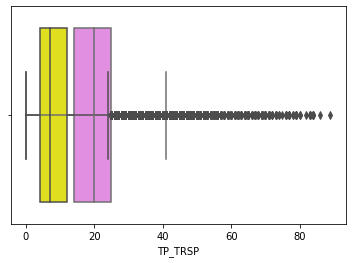

In [ ]:
sns.boxplot(x=df_result.TP_PREV, orient='vertical', color='violet' )
sns.boxplot(x=df_result.TP_TRSP, orient='vertical', color='yellow')

/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


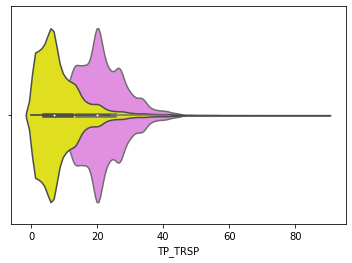

In [ ]:
sns.violinplot(x=df_result.TP_PREV, orient='vertical', color='violet' )
sns.violinplot(x=df_result.TP_TRSP, orient='vertical', color='yellow')

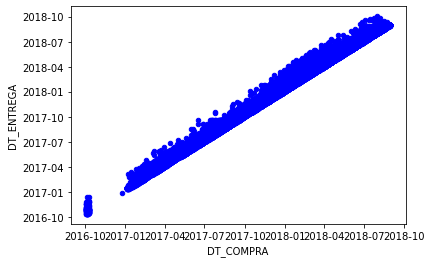

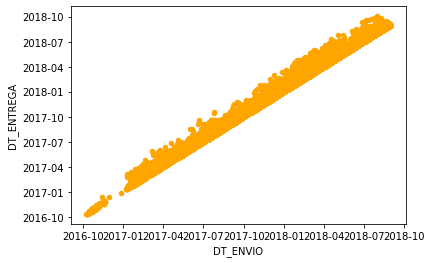

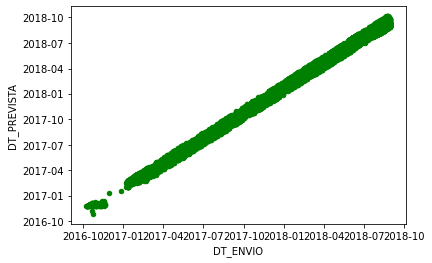

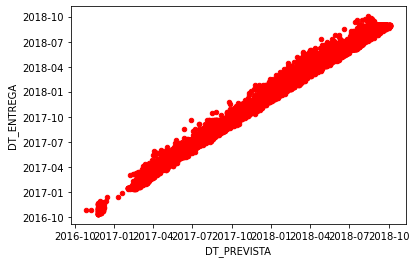

In [ ]:
df_result.plot(x='DT_COMPRA', y='DT_ENTREGA',kind='scatter', color='blue')
df_result.plot(x='DT_ENVIO', y='DT_ENTREGA',kind='scatter', color='orange')
df_result.plot(x='DT_ENVIO', y='DT_PREVISTA',kind='scatter', color='green')
df_result.plot(x='DT_PREVISTA', y='DT_ENTREGA',kind='scatter', color='red')

In [ ]:
df_result.count()

ID_PEDIDO      96810
ID_CLIENTE     96810
STATUS         96810
DT_COMPRA      96810
DT_APROV       96810
DT_ENVIO       96664
DT_ENTREGA     95029
DT_PREVISTA    95029
CL_CEP         96810
CL_CIDADE      96810
CL_UF          96810
TP_PREV        95029
TP_TRSP        95029
dtype: int64

## Conclusão:

A análise revela que de forma geral as operações logísticas da Olist estão funcionando bem, mas alguns ajustes no podem tornar a previsão de entrega mais precisa em relação à realidade.  


# Análises a partir de outras abordagens

### Análise por status do pedido

In [ ]:
df_status = df_result['STATUS'].value_counts()
df_status

delivered      95029
unavailable      609
canceled         550
invoiced         314
processing       301
created            5
approved           2
Name: STATUS, dtype: int64

In [ ]:
print(df_status.index)
print(df_status.values)

Index(['delivered', 'unavailable', 'canceled', 'invoiced', 'processing',
       'created', 'approved'],
      dtype='object')
[95029   609   550   314   301     5     2]


No handles with labels found to put in legend.


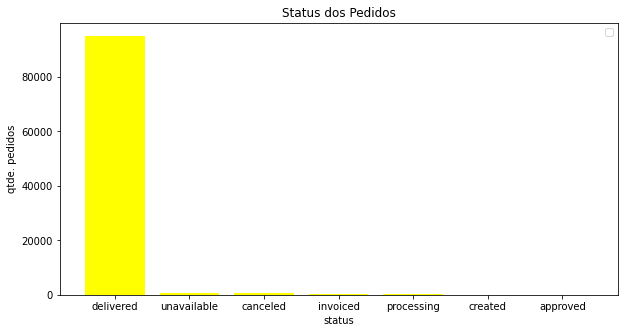

In [ ]:
#Status dos Pedidos X Quantidade de Pedidos

plt.figure(figsize=(10, 5))
x_axis = df_status.index
y_axis = df_status.values
plt.bar(x_axis, y_axis, color='yellow', align='center')

plt.title('Status dos Pedidos')
plt.ylabel('qtde. pedidos')
plt.xlabel('status')
plt.legend(loc='upper right')

plt.show()

### Análise por estados ###

In [ ]:
df_states = df_result['CL_UF'].value_counts()
df_states

SP    40893
RJ    12287
MG    11461
RS     5355
PR     4964
SC     3575
BA     3261
DF     2095
ES     1997
GO     1964
PE     1584
CE     1269
PA      898
MT      872
MA      710
MS      710
PB      511
PI      474
RN      465
AL      395
SE      334
TO      272
RO      237
AM       90
AC       68
AP       42
RR       27
Name: CL_UF, dtype: int64

In [ ]:
print(df_states.index)
print(df_states.values)

Index(['SP', 'RJ', 'MG', 'RS', 'PR', 'SC', 'BA', 'DF', 'ES', 'GO', 'PE', 'CE',
       'PA', 'MT', 'MA', 'MS', 'PB', 'PI', 'RN', 'AL', 'SE', 'TO', 'RO', 'AM',
       'AC', 'AP', 'RR'],
      dtype='object')
[40893 12287 11461  5355  4964  3575  3261  2095  1997  1964  1584  1269
   898   872   710   710   511   474   465   395   334   272   237    90
    68    42    27]


No handles with labels found to put in legend.


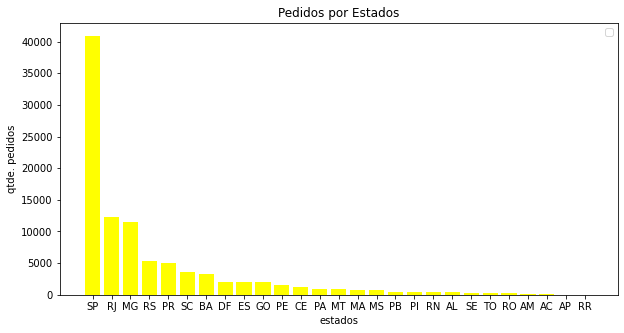

In [ ]:
#Exibição dos pedidos por estados em gráfico de barras.

plt.figure(figsize=(10, 5))
x_axis = df_states.index
y_axis = df_states.values
plt.bar(x_axis, y_axis, color='yellow')

plt.title('Pedidos por Estados')
plt.ylabel('qtde. pedidos')
plt.xlabel('estados')
plt.legend(loc='upper right')

plt.show()

### Verificando a existencia de correlações

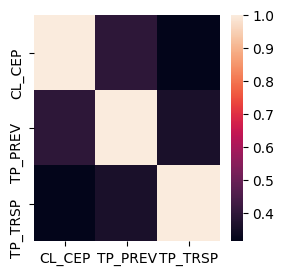

In [ ]:
# Aplicação da Matriz Confusão:

%matplotlib inline


plt.figure(figsize= (3,3), dpi=100)  # Configura as dimensões do gráfico a ser exibido.
sbn.heatmap(df_result.corr())               # Aplica a função "heatmap" a qual exibe todas as correlações exitente entre os dados do dataframe.

#plt.savefig('/content/drive/My Drive/Dados_DS/Dados Olist/Result_C.png') # Salva uma imagem (PNG) do gráfico gerado no drive do Google.

# Conclusão:

Obs: Segundo a Wikipedia, em 1992 o Brasil foi dividido em dez zonas postais, de 0 a 9, contadas a partir do estado de São Paulo, no sentido anti-horário. A partir dessa devisão os número de CEPs foram distribuídos e estruturados de forma a identificar cada uma das localizações no país.


### A Matriz Confusão exibida acima sugere a existência de uma forte correlação inversamente proporcional entre os locais de entrega e o tempo necessário para que a entrega seja realizada. Quanto ao tempo previsto, este acompanha a tendência observada no levantamento do tempo real de entrega e, embora ligeiramente impreciso, apresenta um alto grau de acerto não requerendo maiores ajustes.

====================================================== FIM ========================================================